In [1]:
#Import dependencies
import pandas as pd 
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, text, inspect
import json

In [2]:
# Read in the csv
filepath = "data/Map_data.csv"
df = pd.read_csv(filepath)
df.head()

,Air Date,Airdate,City,Country,Day,Description,Episode,Latitude,Longitude,Month1,Month,Number of Records,Order,Region,Season,Show,Source,State,Title,Year
0,1/8/2002,"January 8, 2002",Tokyo,Japan,8,Join Tony in Tokyo as he learns about the Japa...,1,35.689487,139.691706,1,January,1,1,Asia,1,A Cook's Tour,https://www.cookingchanneltv.com/shows/a-cooks...,NaN,A Taste of Tokyo,2002
1,1/12/2002,"January 12, 2002",Atami,Japan,12,Rural Japan: Tony decides to look for a more r...,2,35.096276,139.071705,1,January,1,2,Asia,1,A Cook's Tour,https://www.cookingchanneltv.com/shows/a-cooks...,NaN,Dining with Geishas,2002
2,1/15/2002,"January 15, 2002",Ho Chi Minh City,Vietnam,15,Travel with Tony Bourdain to Ho Chi Minh City ...,3,10.823099,106.629664,1,January,1,3,Asia,1,A Cook's Tour,https://www.cookingchanneltv.com/shows/a-cooks...,NaN,Cobra Heart - Foods That Make You Manly,2002
3,1/15/2002,"January 15, 2002",Mekong River,Vietnam,15,"On the river, Tony drinks a lot of Mekong moon...",4,15.933589,103.449284,1,January,1,4,Asia,1,A Cook's Tour,https://www.cookingchanneltv.com/shows/a-cooks...,NaN,Eating on the Mekong,2002
4,1/22/2002,"January 22, 2002",Phnom Penh,Cambodia,22,"With a friend along for the ride, Tony travels...",5,11.556374,104.928210,1,January,1,5,Asia,1,A Cook's Tour,https://www.cookingchanneltv.com/shows/a-cooks...,NaN,Wild Delicacies,2002


In [3]:
# Take a look at the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Air Date           495 non-null    object 
 1   Airdate            495 non-null    object 
 2   City               495 non-null    object 
 3   Country            495 non-null    object 
 4   Day                495 non-null    int64  
 5   Description        495 non-null    object 
 6   Episode            495 non-null    int64  
 7   Latitude           495 non-null    float64
 8   Longitude          495 non-null    float64
 9   Month1             495 non-null    int64  
 10  Month              495 non-null    object 
 11  Number of Records  495 non-null    int64  
 12  Order              495 non-null    int64  
 13  Region             495 non-null    object 
 14  Season             495 non-null    int64  
 15  Show               495 non-null    object 
 16  Source             495 non

In [4]:
# Delete unnecessary columns
df = df.drop(columns=['Airdate', 'Description', 'Source', 'Number of Records'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Air Date   495 non-null    object 
 1   City       495 non-null    object 
 2   Country    495 non-null    object 
 3   Day        495 non-null    int64  
 4   Episode    495 non-null    int64  
 5   Latitude   495 non-null    float64
 6   Longitude  495 non-null    float64
 7   Month1     495 non-null    int64  
 8   Month      495 non-null    object 
 9   Order      495 non-null    int64  
 10  Region     495 non-null    object 
 11  Season     495 non-null    int64  
 12  Show       495 non-null    object 
 13  State      140 non-null    object 
 14  Title      495 non-null    object 
 15  Year       495 non-null    int64  
dtypes: float64(2), int64(6), object(8)
memory usage: 62.0+ KB


In [5]:
# Convert Air Date column to datetime format
df['Air Date'] = pd.to_datetime(df['Air Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Air Date   495 non-null    datetime64[ns]
 1   City       495 non-null    object        
 2   Country    495 non-null    object        
 3   Day        495 non-null    int64         
 4   Episode    495 non-null    int64         
 5   Latitude   495 non-null    float64       
 6   Longitude  495 non-null    float64       
 7   Month1     495 non-null    int64         
 8   Month      495 non-null    object        
 9   Order      495 non-null    int64         
 10  Region     495 non-null    object        
 11  Season     495 non-null    int64         
 12  Show       495 non-null    object        
 13  State      140 non-null    object        
 14  Title      495 non-null    object        
 15  Year       495 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(6), 

In [6]:
# Rename columns with spaces
df = df.rename(columns={"Air Date": "Air_Date"})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Air_Date   495 non-null    datetime64[ns]
 1   City       495 non-null    object        
 2   Country    495 non-null    object        
 3   Day        495 non-null    int64         
 4   Episode    495 non-null    int64         
 5   Latitude   495 non-null    float64       
 6   Longitude  495 non-null    float64       
 7   Month1     495 non-null    int64         
 8   Month      495 non-null    object        
 9   Order      495 non-null    int64         
 10  Region     495 non-null    object        
 11  Season     495 non-null    int64         
 12  Show       495 non-null    object        
 13  State      140 non-null    object        
 14  Title      495 non-null    object        
 15  Year       495 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(6), 

In [7]:
# Send to sqlite
path = "sqlite:///Map_data.sqlite"
engine = create_engine(path)
df.to_sql("Map_data", con=engine, method="multi", if_exists="replace", index=False)

495

In [8]:
# Create json data
data = df.to_json(orient="records")
with open ("data.json", "w") as f:
    f.write(data)

In [9]:
# Create a variable for the count of each show
show_count = df.Show.value_counts()
show_count

No Reservations    275
Parts Unknown      158
A Cook's Tour       42
The Layover         20
Name: Show, dtype: int64

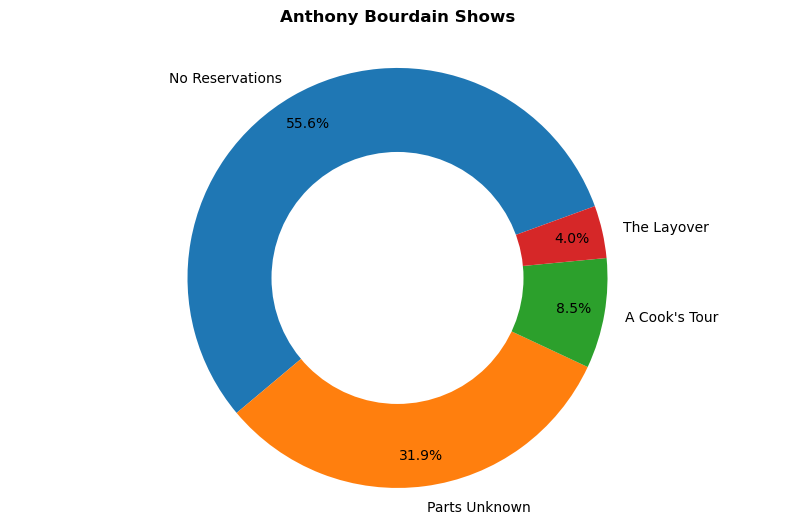

In [10]:
# What was Anthony Bourdain’s top show (longest running, and most episodes)?
plt.figure(figsize=(10,6))
plt.pie(show_count, labels=show_count.index,
        autopct="%1.1f%%", pctdistance=0.85, shadow=False, startangle=20)

# Draw circle
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.title("Anthony Bourdain Shows\n", fontweight="bold")
plt.axis("equal")

plt.show()

In [11]:
# Create a variable for the count of each region
region_count = df.Region.value_counts()
region_count

North America      159
Asia                94
Europe              94
South America       42
Africa              32
Central America     32
Middle East         24
Oceania             14
Antarctica           4
Name: Region, dtype: int64

In [12]:
# Create a regional dataframe
df_region = df.value_counts("Region").reset_index()
df_region.columns = ["Region", "No_of_Visits"]
df_region = df_region.sort_values(by="No_of_Visits", ascending=False)
df_region

,Region,No_of_Visits
0,North America,159
1,Asia,94
2,Europe,94
3,South America,42
4,Africa,32
5,Central America,32
6,Middle East,24
7,Oceania,14
8,Antarctica,4


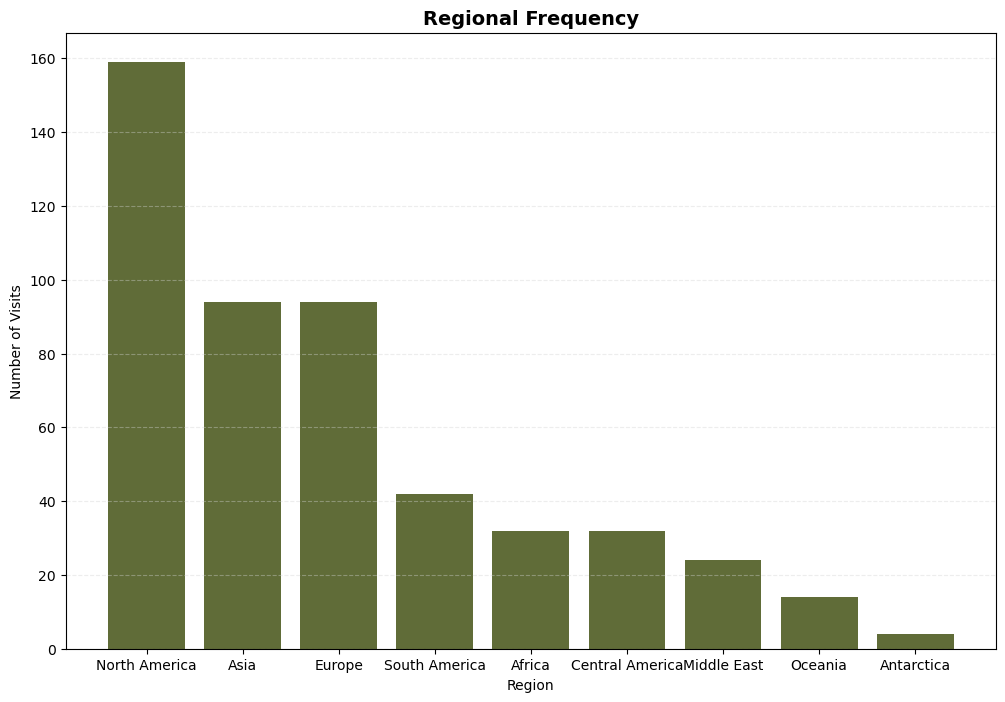

In [13]:
# Do we see any trends in general area or country frequency, and are those trends aligned across shows?

# Region
plt.figure(figsize=(12,8))
plt.bar(df_region.Region, df_region.No_of_Visits, color="#606c38")

# customize
plt.title("Regional Frequency", fontsize=14, fontweight="bold")
plt.xlabel("Region")
plt.ylabel("Number of Visits")

# plt.ylim(0, 100)

plt.grid(axis="y", c="lightgray", linestyle="dashed", alpha=0.4)

# Finish the plot
plt.show()

In [14]:
# Create a variable for the count of each country
country_count = df.Country.value_counts()
country_count

United States    141
France            21
Italy             20
Japan             16
China             15
                ... 
Haiti              1
Sweden             1
Finland            1
Austria            1
Taiwan             1
Name: Country, Length: 86, dtype: int64

In [15]:
# Create a country dataframe
df_country = df.value_counts("Country").reset_index()
df_country.columns = ["Country", "No_of_Visits"]
df_country = df_country.sort_values(by="No_of_Visits", ascending=False)
df_country

,Country,No_of_Visits
0,United States,141
1,France,21
2,Italy,20
3,Japan,16
4,China,15
...,...,...
66,United Arab Emirates,1
65,Armenia,1
64,Trinidad and Tobago,1
63,Sweden,1


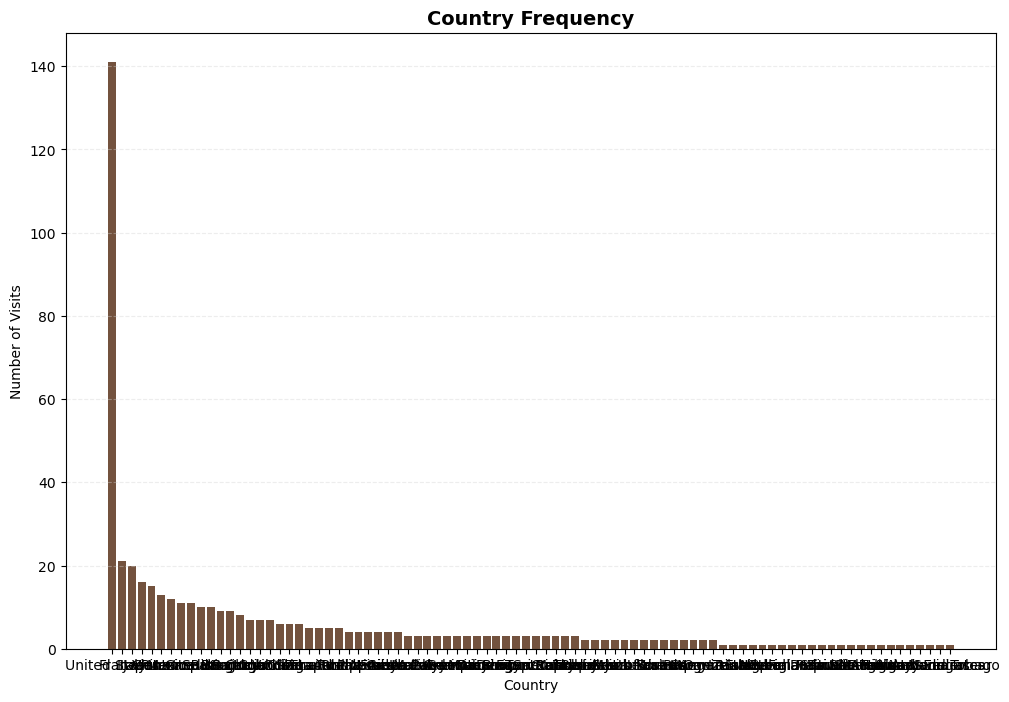

In [16]:
# Country
plt.figure(figsize=(12,8))
plt.bar(df_country.Country, df_country.No_of_Visits, color="#73523e")

# customize
plt.title("Country Frequency", fontsize=14, fontweight="bold")
plt.xlabel("Country")
plt.ylabel("Number of Visits")

# plt.ylim(0, 100)

plt.grid(axis="y", c="lightgray", linestyle="dashed", alpha=0.4)

# Finish the plot
plt.show()

In [17]:
from math import radians, degrees, sin, cos, asin, acos, sqrt
def great_circle(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    return 6371 * (
        acos(sin(lat1) * sin(lat2) + cos(lat1) * cos(lat2) * cos(lon1 - lon2))
    )

In [20]:
from math import radians, degrees, sin, cos, asin, acos, sqrt
def great_circle(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    return 6371 * (
        acos(sin(lat1) * sin(lat2) + cos(lat1) * cos(lat2) * cos(lon1 - lon2))
    )

    # Haversine formula
    d_lat = lat2_rad - lat1_rad
    d_lon = lon2_rad - lon1_rad

    a = sin(d_lat / 2) ** 2 + cos(lat1_rad) * cos(lat2_rad) * sin(d_lon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # Radius of Earth in kilometers
    radius = 6371

    # Calculate the distance
    distance = radius * c
    return distance



# Lists to store latitude and longitude data
latitude_list = df['Latitude'].tolist()
longitude_list = df['Longitude'].tolist()

# Calculate distances using the sequential latitude and longitude data
total_distance = 0.0
for i in range(len(latitude_list) - 1):
    lat1 = latitude_list[i]
    lon1 = longitude_list[i]
    lat2 = latitude_list[i + 1]
    lon2 = longitude_list[i + 1]

    distance = great_circle(lat1, lon1, lat2, lon2)
    total_distance += distance

print(f"The total great-circle distance is {total_distance:.2f} kilometers.")

The total great-circle distance is 2772900.91 kilometers.
